In [1]:
from jax import numpy as jnp
import matplotlib.pyplot as plt

In [2]:
def ReLU(preactivation):
    return jnp.maximum(0, preactivation)

In [9]:
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):
    layer1_pre_1 = theta[1, 0] * x + theta[1, 1]
    layer1_pre_2 = theta[2, 0] * x + theta[2, 1]
    layer1_pre_3 = theta[3, 0] * x + theta[3, 1]

    h1 = activation_fn(layer1_pre_1)
    h2 = activation_fn(layer1_pre_2)
    h3 = activation_fn(layer1_pre_3)

    layer2_pre_1 = psi[1, 0] * h1 + psi[1, 1] * h2 + psi[1, 2] * h3 + psi[1, 3]
    layer2_pre_2 = psi[2, 0] * h1 + psi[2, 1] * h2 + psi[2, 2] * h3 + psi[2, 3]
    layer2_pre_3 = psi[3, 0] * h1 + psi[3, 1] * h2 + psi[3, 2] * h3 + psi[3, 3]

    h1_prime = activation_fn(layer2_pre_1)
    h2_prime = activation_fn(layer2_pre_2)
    h3_prime = activation_fn(layer2_pre_3)

    phi1_h1_prime = phi[1] * h1_prime
    phi2_h2_prime = phi[2] * h2_prime
    phi3_h3_prime = phi[3] * h3_prime

    y = phi[0] + phi1_h1_prime + phi2_h2_prime + phi3_h3_prime

    return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

In [18]:
def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,layer2_pre_1,'r-'); ax[0,0].set_ylabel(r'psi10 + psi11*h1 + psi12*h2 + psi13*h3')
    ax[0,1].plot(x,layer2_pre_2,'b-'); ax[0,1].set_ylabel(r'psi20 + psi21*h1 + psi22*h2 + psi23*h3')
    ax[0,2].plot(x,layer2_pre_3,'g-'); ax[0,2].set_ylabel(r'psi30 + psi31*h1 + psi32*h2 + psi33*h3')
    ax[1,0].plot(x,h1_prime,'r-'); ax[1,0].set_ylabel(r"h1'")
    ax[1,1].plot(x,h2_prime,'b-'); ax[1,1].set_ylabel(r"h2'")
    ax[1,2].plot(x,h3_prime,'g-'); ax[1,2].set_ylabel(r"h3'")
    ax[2,0].plot(x,phi1_h1_prime,'r-'); ax[2,0].set_ylabel(r"phi1 * h1'")
    ax[2,1].plot(x,phi2_h2_prime,'b-'); ax[2,1].set_ylabel(r"phi2 * h2'")
    ax[2,2].plot(x,phi3_h3_prime,'g-'); ax[2,2].set_ylabel(r"phi3 * h3'")

    for plot_y in range(3):
        for plot_x in range(3):
            ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
        ax[2,plot_y].set_xlabel(r'Input, ')
        plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel(r'Input, '); ax.set_ylabel(r'Output, ')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()


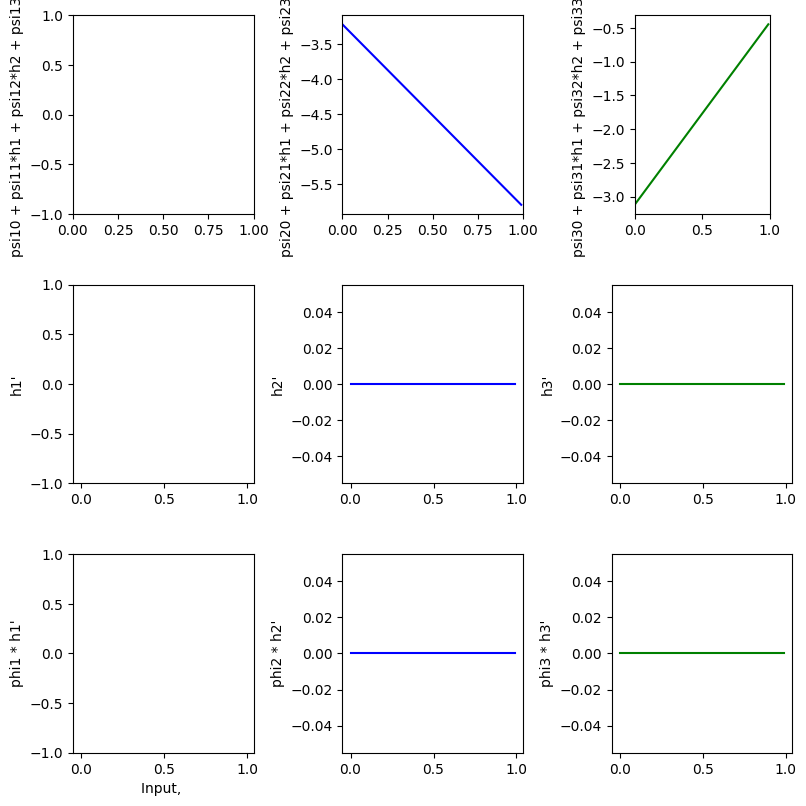

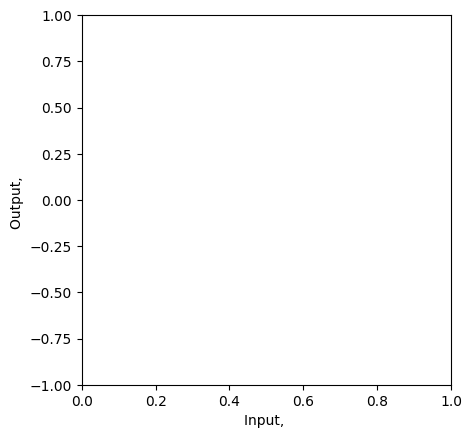

In [19]:
theta = jnp.zeros([4,2])
psi = jnp.zeros([4,4])
phi = jnp.zeros([4,1])

theta = theta.at[1,0].set(0.3)
theta = theta.at[1,1].set(-1.0)
theta = theta.at[2,0].set(-1.0)
theta = theta.at[2,1].set(2.0)
theta = theta.at[3,0].set(-0.5)
theta = theta.at[3,1].set(0.65)

psi = psi.at[1,0].set(0.3)
psi = psi.at[1,1].set(2.0)
psi = psi.at[1,2].set(-1.0)
psi = psi.at[1,3].set(7.0)
psi = psi.at[2,0].set(-0.2)
psi = psi.at[2,1].set(2.0)
psi = psi.at[2,2].set(1.2)
psi = psi.at[2,3].set(-8.0)
psi = psi.at[3,0].set(0.3)
psi = psi.at[3,1].set(-2.3)
psi = psi.at[3,2].set(-0.8)
psi = psi.at[3,3].set(2.0)

phi = phi.at[0].set(0.0)
phi = phi.at[1].set(0.5)
phi = phi.at[2].set(-1.5)
phi = phi.at[3].set(2.2)


# Define a range of input values
x = jnp.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)
